# Multi Linear Regression

# Question 1

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [124]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: >

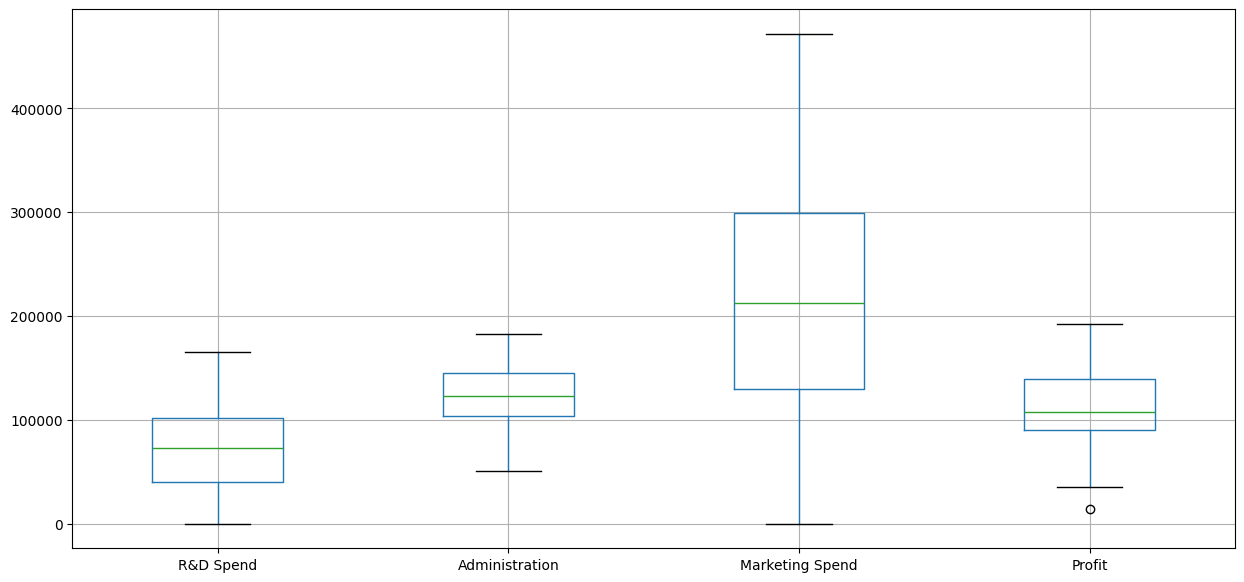

In [125]:
df.boxplot()

In [126]:
data=df.copy()

In [127]:
data.drop(columns=['State'],inplace=True)

In [128]:
data.rename(columns={'R&D Spend':'Spend','Marketing Spend':'Mspend'},inplace=True)

In [129]:
data.head()

,Spend,Administration,Mspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Finding Correlation

In [130]:
data.corr()

,Spend,Administration,Mspend,Profit
Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Mspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


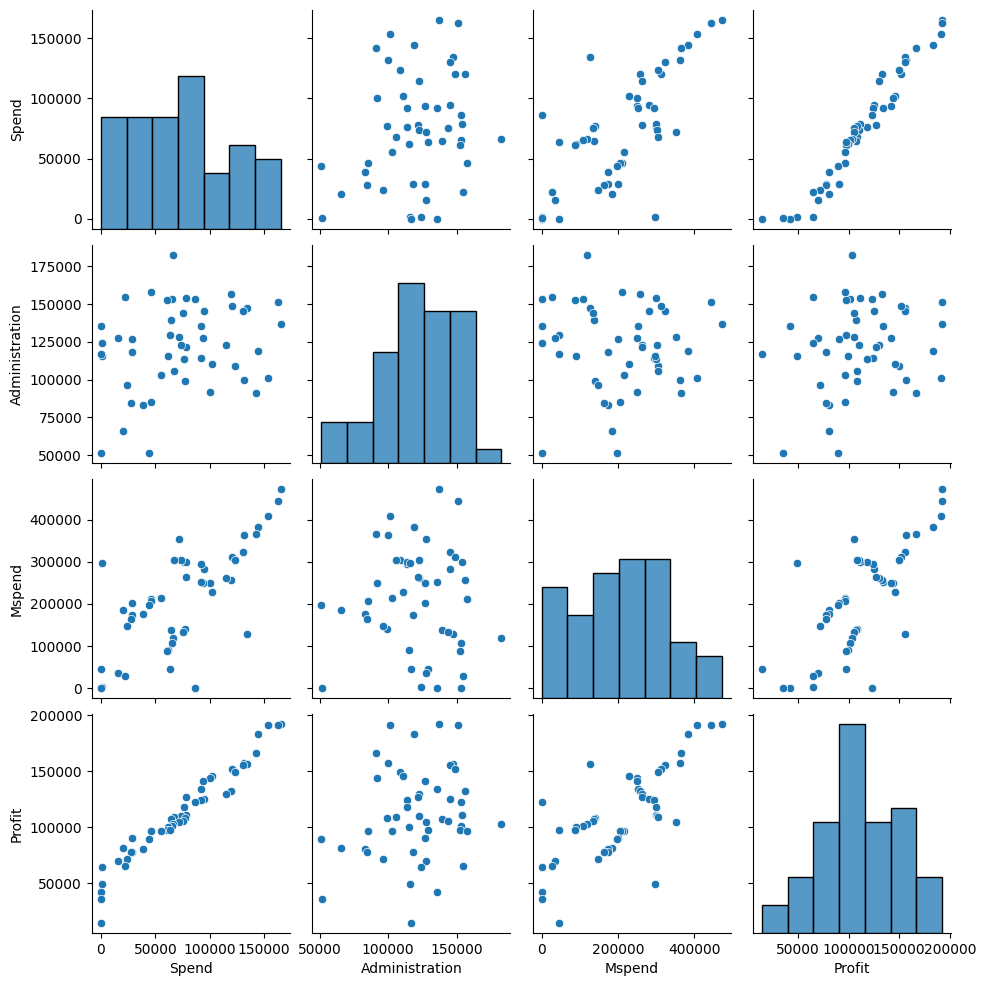

In [131]:
sns.pairplot(data)

<Axes: >

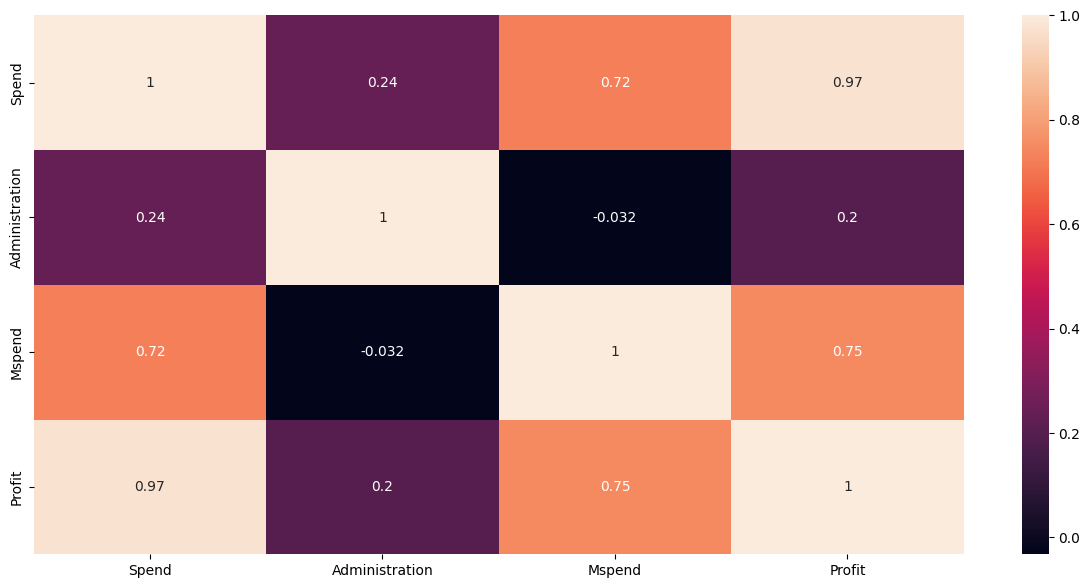

In [132]:
sns.heatmap(data.corr(),annot=True)

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
ndata=data.iloc[:,:-1]

In [135]:
ndata

,Spend,Administration,Mspend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [136]:
ndata.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [137]:
vif=pd.DataFrame()
vif

""


In [138]:
vif['Features']=ndata.columns
vif

,Features
0,Spend
1,Administration
2,Mspend


In [139]:
vif['vif']=[variance_inflation_factor(ndata.values,i) for i in range(len(ndata.columns))]
vif

,Features,vif
0,Spend,8.384571
1,Administration,4.026406
2,Mspend,7.593984


# Creating MOdels

In [140]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~Spend+Administration+Mspend',data=data).fit()

In [141]:
model.params

Intercept         50122.192990
Spend                 0.805715
Administration       -0.026816
Mspend                0.027228
dtype: float64

In [142]:
model.pvalues

Intercept         1.057379e-09
Spend             2.634968e-22
Administration    6.017551e-01
Mspend            1.047168e-01
dtype: float64

In [143]:
model.rsquared,model.aic

(0.9507459940683246, 1058.7714985998055)

In [144]:
model2=smf.ols('Profit~Administration+Mspend',data=data).fit()

In [145]:
model2.pvalues

Intercept         2.589341e-01
Administration    1.729198e-02
Mspend            9.727245e-11
dtype: float64

In [146]:
model2.rsquared,model2.aic

(0.6097229746770663, 1160.2648038638672)

In [147]:
model3=smf.ols('Profit~Spend+Administration',data=data).fit()

In [148]:
model3.pvalues

Intercept         5.695336e-12
Spend             2.278348e-31
Administration    2.888932e-01
dtype: float64

In [149]:
model3.rsquared,model3.aic

(0.9478129385009173, 1059.6636934567293)

In [150]:
model4=smf.ols('Profit~Spend+Mspend',data=data).fit()

In [151]:
model4.pvalues

Intercept    3.504062e-22
Spend        6.040433e-24
Mspend       6.003040e-02
dtype: float64

In [152]:
model4.rsquared,model4.aic

(0.9504503015559763, 1057.070772191826)

In [153]:
# model is choosed based on rsquarred and aic value
import statsmodels.api as sm

In [154]:
model.params

Intercept         50122.192990
Spend                 0.805715
Administration       -0.026816
Mspend                0.027228
dtype: float64

In [155]:
model.pvalues

Intercept         1.057379e-09
Spend             2.634968e-22
Administration    6.017551e-01
Mspend            1.047168e-01
dtype: float64

# Improving Model

In [156]:
data

,Spend,Administration,Mspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [157]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [158]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

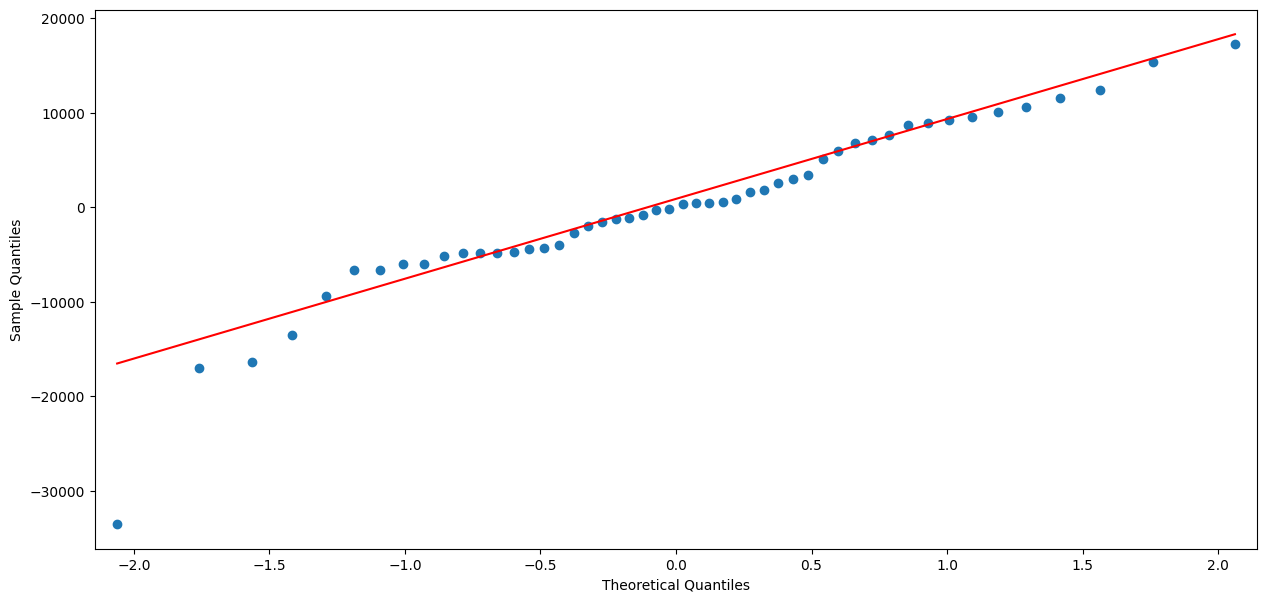

In [159]:
sm.qqplot(model.resid,line='q');

In [160]:
np.argmax(model.resid),np.max(model.resid)

(45, 17275.430313093602)

Text(0, 0.5, 'Errors')

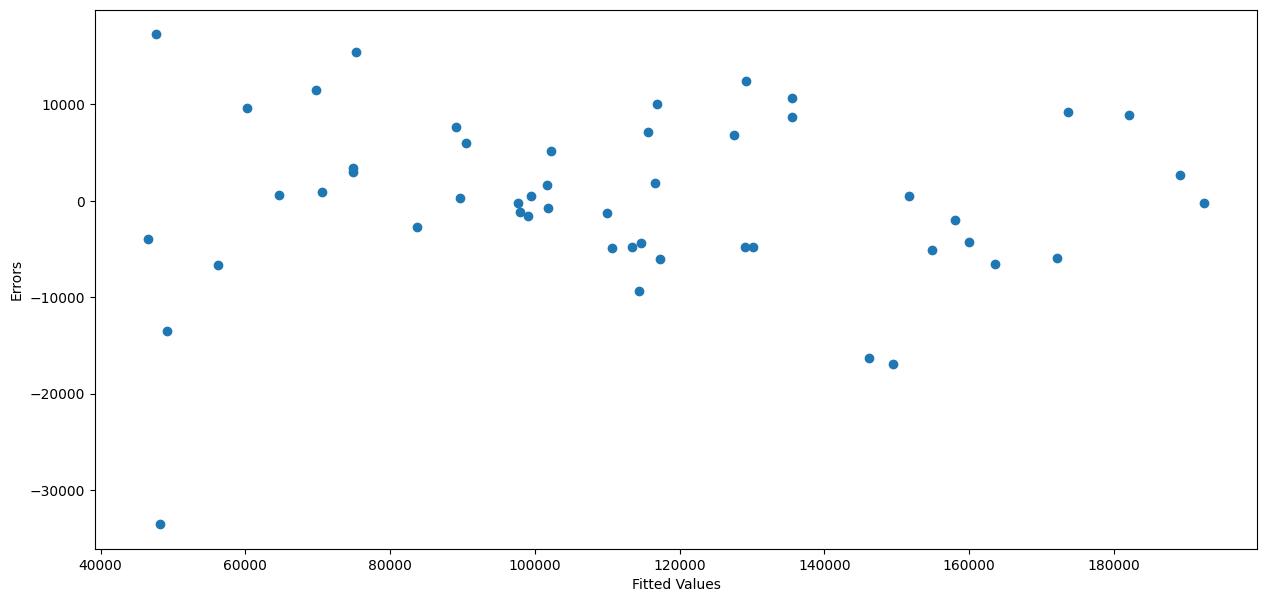

In [161]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Errors')

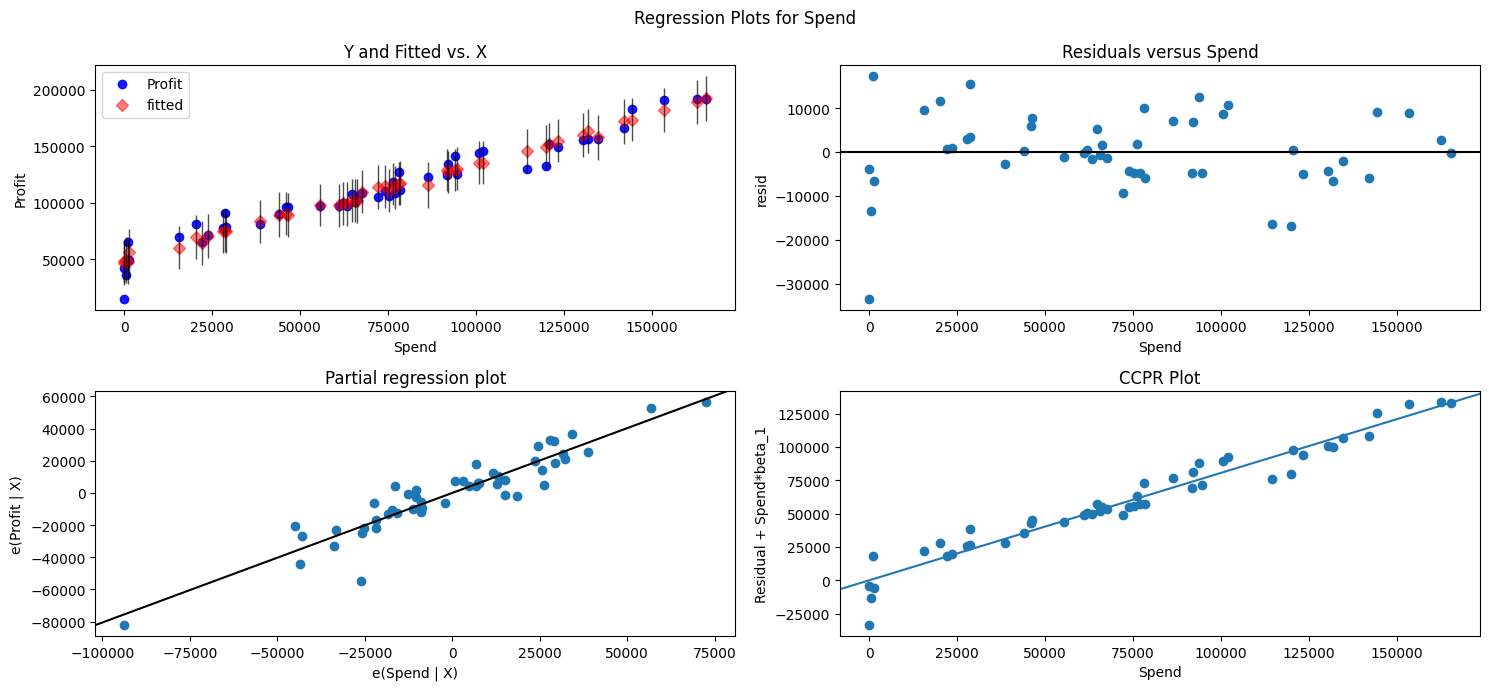

In [162]:
plt.rcParams['figure.figsize']=(15,7)
sm.graphics.plot_regress_exog(model,'Spend');


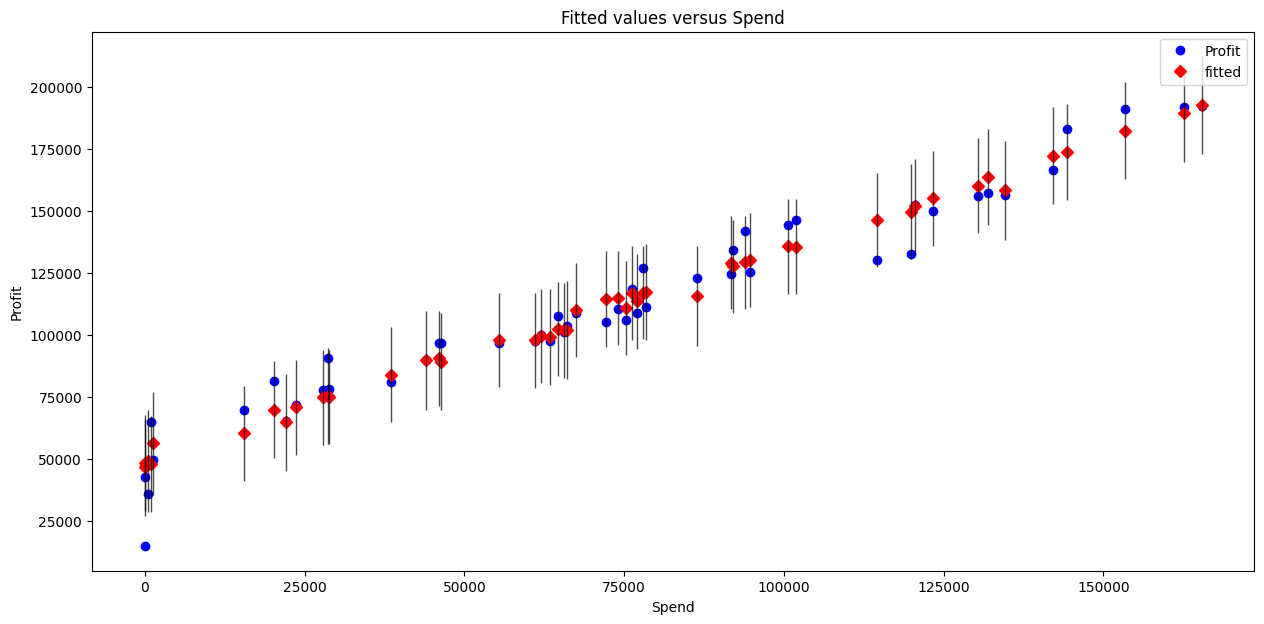

In [163]:
sm.graphics.plot_fit(model,'Spend');

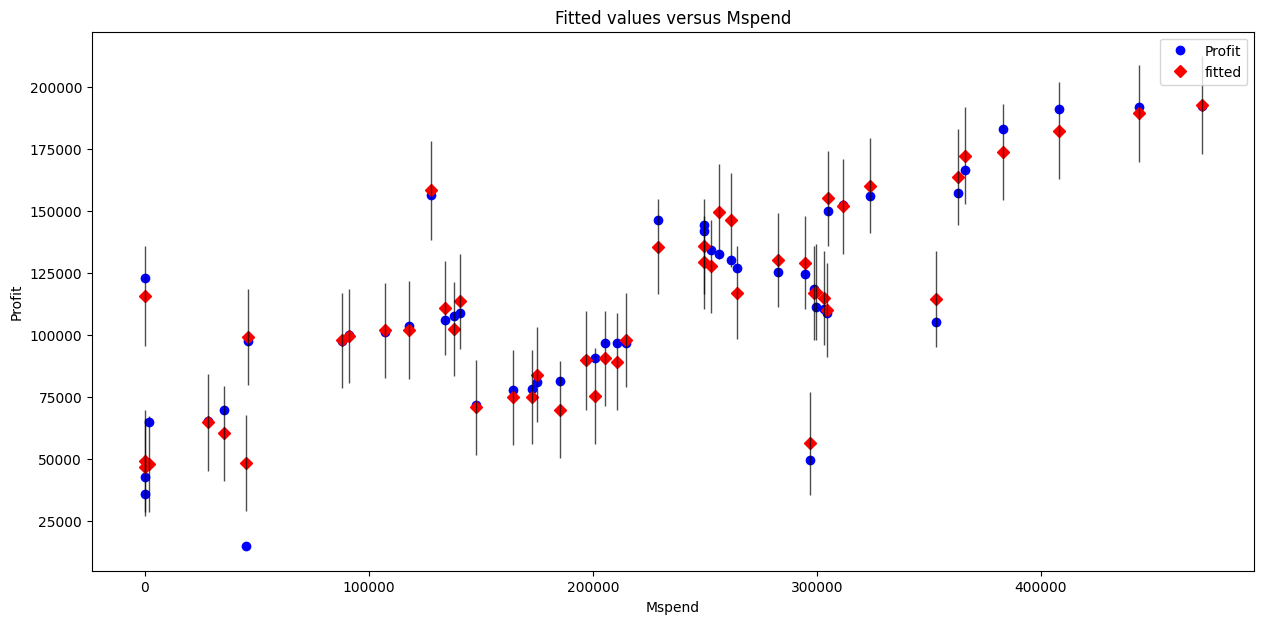

In [164]:
sm.graphics.plot_fit(model,'Mspend');

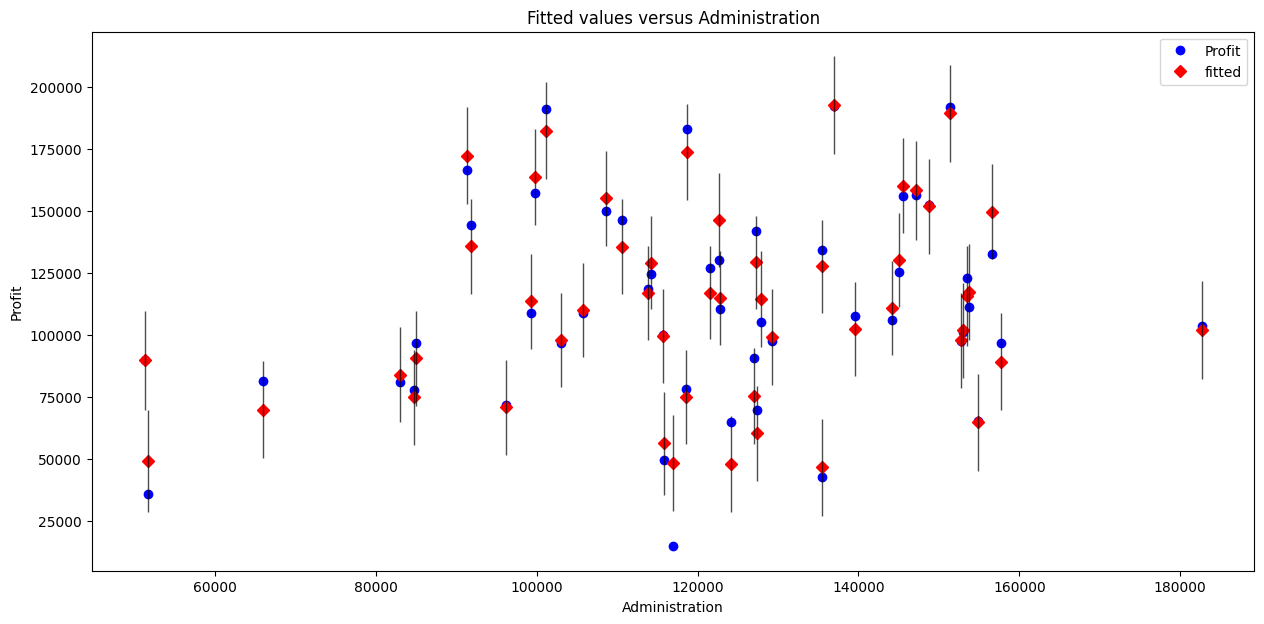

In [165]:
sm.graphics.plot_fit(model,'Administration');

In [166]:
inf=model.get_influence()
c,p=inf.cooks_distance

In [167]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'cooks distance')

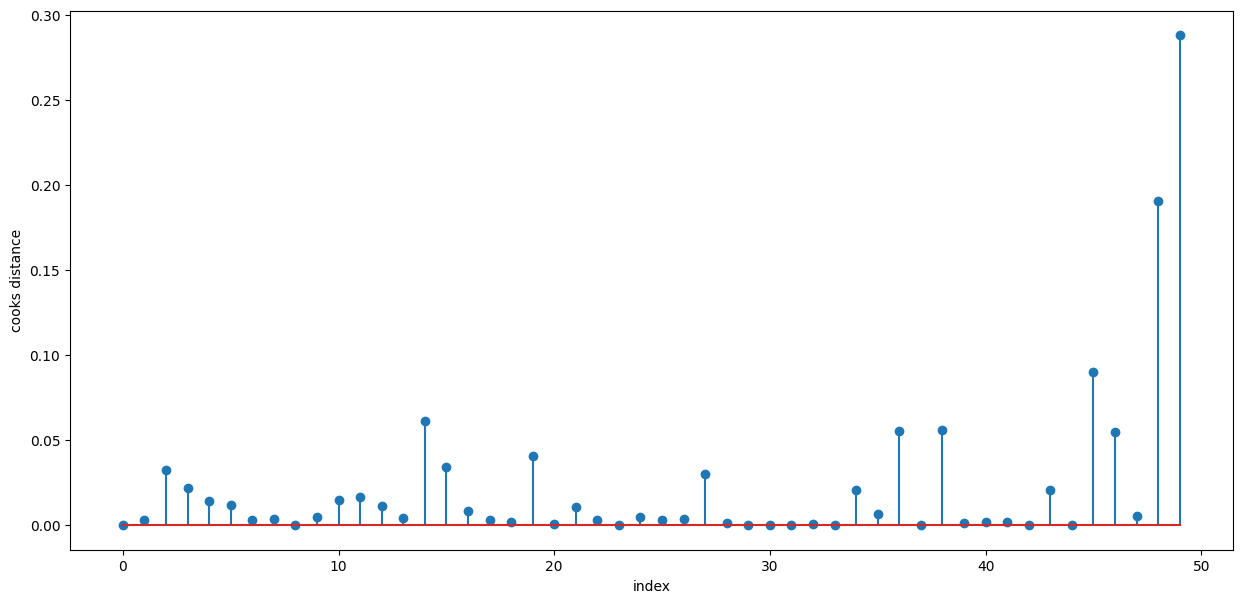

In [168]:
plt.stem(c)
plt.xlabel('index')
plt.ylabel('cooks distance')

In [169]:
np.argmax(c),np.max(c)

(49, 0.2880822927543264)

In [170]:
data.iloc[[49]]

,Spend,Administration,Mspend,Profit
49,0.0,116983.8,45173.06,14681.4


In [171]:
from statsmodels.graphics.regressionplots import influence_plot

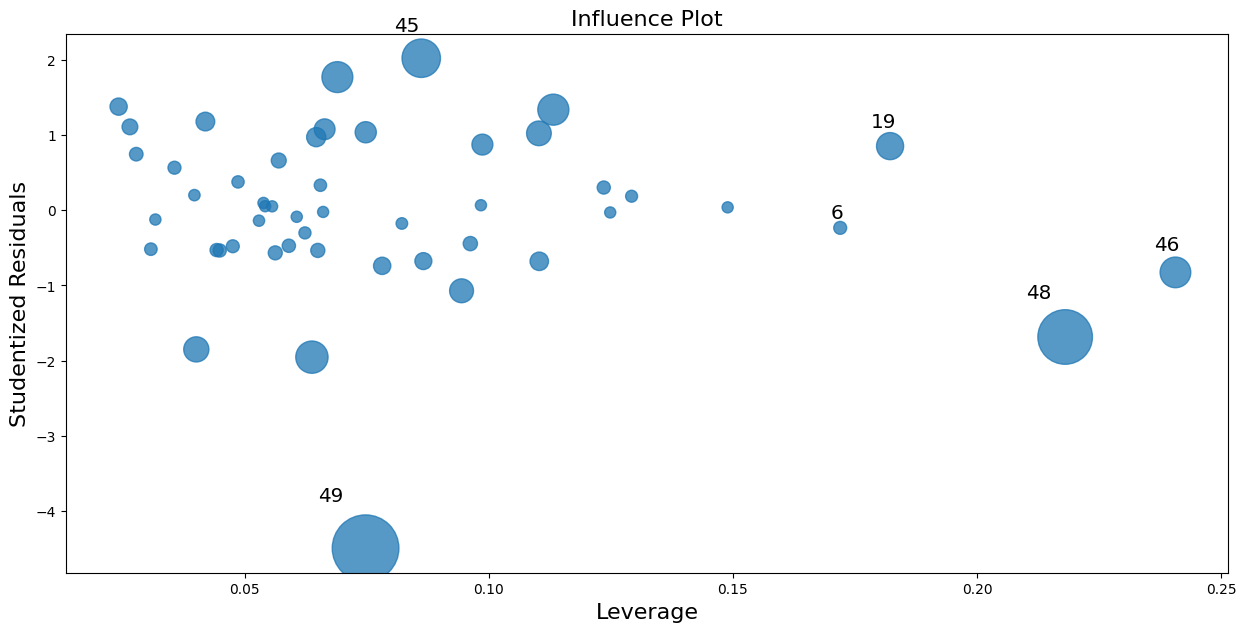

In [172]:
influence_plot(model);

In [173]:
k=len(data.columns)
n=len(data)
levrage=3*(k-1)/n
levrage

0.18

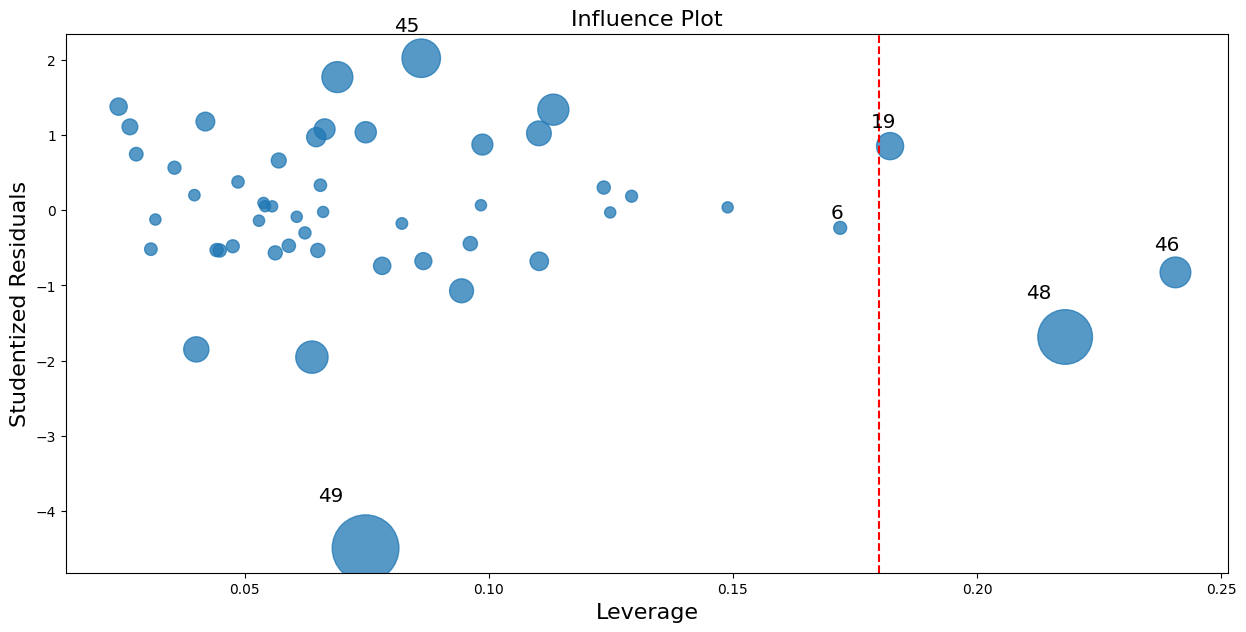

In [174]:
influence_plot(model);
plt.axvline(levrage,linestyle='--',color='red')

In [175]:
data.drop(index=[48,46,19],inplace=True)

In [176]:
data.reset_index(inplace=True)

In [177]:
data.drop(columns=['index'],inplace=True)

In [178]:
data.head()

,Spend,Administration,Mspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Creating Final Model

In [179]:
final_model=smf.ols('Profit~Spend+Administration+Mspend',data=data).fit()

In [180]:
final_model.params

Intercept         54356.330940
Spend                 0.776716
Administration       -0.053277
Mspend                0.034095
dtype: float64

In [181]:
final_model.pvalues

Intercept         3.658299e-09
Spend             4.122495e-18
Administration    3.405752e-01
Mspend            9.993242e-02
dtype: float64

In [182]:
final_model.rsquared,final_model.aic

(0.9486075871445188, 994.185162336991)

# Testing MOdel

In [183]:
test=pd.DataFrame({'Spend':[123356.88],'Administration':[108675.17],'Mspend':[304971.62]})
test

,Spend,Administration,Mspend
0,123356.88,108675.17,304971.62


In [184]:
final_model.predict(test)

0    154777.559126
dtype: float64